In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Final_data.csv', encoding='latin')

In [3]:
data.head()

,Unnamed: 0,Title,Headline,Body,Combined,Label
0,0,Farrell due to make US TV debut,Actor Colin Farrell is to make his debut on US...,"The film star, who recently played the title r...",Farrell due to make US TV debut Actor Colin Fa...,entertainment
1,1,Souness eyes summer move for Owen,Newcastle boss Graeme Souness is lining up a s...,He sees Owen as the ideal replacement for Alan...,Souness eyes summer move for Owen Newcastle bo...,sport
2,2,Set your television to wow,Television started off as a magical blurry ima...,After years of buzz about high-definition TV (...,Set your television to wow Television started ...,tech
3,3,Lib Dems target the student vote,Students can decide the fate of MPs in some se...,The party says the votes of students can win i...,Lib Dems target the student vote Students can ...,politics
4,4,Hewitt overcomes wobble in Sydney,Lleyton Hewitt gave himself the perfect prepar...,The defending champion brushed aside the Czech...,Hewitt overcomes wobble in Sydney Lleyton Hewi...,sport


### Checking the Distribution of the Dataset

C:\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Distribution of Instances'}, xlabel='Label', ylabel='count'>

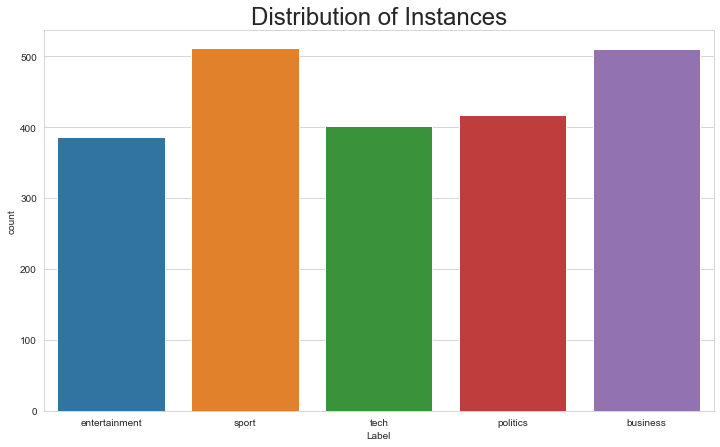

In [4]:
plt.figure(figsize=(12,7))

plt.title("Distribution of Instances",fontdict={'fontsize': 24, 'fontweight':'medium'})
sns.countplot(data['Label'])
# We can see that the data is balanced 

In [5]:
# data['Label'].value_counts()
for x in list(data['Label'].value_counts()):
    print(x/2225)

0.22966292134831462
0.2292134831460674
0.18741573033707865
0.1802247191011236
0.17348314606741572


In [6]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

In [7]:
# We want to convert our labels to Numerical features so that our ML model can understant
lb = LabelEncoder()
data['N-labels'] = lb.fit_transform(data['Label'])

In [8]:
# Our classes 0:business, 1:entertainment, 2:politics, 3:sport, 4:tech
lb.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [88]:
business = data[data['Label']=='business']
entertainment = data[data['Label']=='entertainment']
politics = data[data['Label']=='politics']
sport = data[data['Label']=='sport']
tech = data[data['Label']=='tech']

def cv_class_wise(dataframe):
    cv = CountVectorizer()
    d = cv.fit_transform(dataframe['Combined'])
    # print(d.shape[1])
    complete_corpus = pd.DataFrame(d.A, columns=cv.get_feature_names())
    complete_corpus['Number of Zeros'] = (complete_corpus==0).sum(axis=1)
    complete_corpus['Number of Ones'] = (complete_corpus==1).sum(axis=1)
    complete_corpus['Per of Zeros'] = (complete_corpus==0).sum(axis=1)/d.shape[1]
    complete_corpus['Per of Ones'] = (complete_corpus==1).sum(axis=1)/d.shape[1]
    number_of_0 = complete_corpus['Number of Zeros'].sum(axis=0)
    number_of_1 = complete_corpus['Number of Ones'].sum(axis=0)

    per_of_0 =  complete_corpus['Per of Zeros'].sum(axis = 0)/d.shape[0]
    per_of_1 =  complete_corpus['Per of Ones'].sum(axis = 0)/d.shape[0]

    

    return {
        "Number of 0s":number_of_0,
        "Number of 1s":number_of_1,
        "Per of 0s":f"{per_of_0:.4}",
        "Per of 1s":f"{per_of_1:.4}",
    }
    
    

In [89]:
data.head()

,Unnamed: 0,Title,Headline,Body,Combined,Label,N-labels
0,0,Farrell due to make US TV debut,Actor Colin Farrell is to make his debut on US...,"The film star, who recently played the title r...",Farrell due to make US TV debut Actor Colin Fa...,entertainment,1
1,1,Souness eyes summer move for Owen,Newcastle boss Graeme Souness is lining up a s...,He sees Owen as the ideal replacement for Alan...,Souness eyes summer move for Owen Newcastle bo...,sport,3
2,2,Set your television to wow,Television started off as a magical blurry ima...,After years of buzz about high-definition TV (...,Set your television to wow Television started ...,tech,4
3,3,Lib Dems target the student vote,Students can decide the fate of MPs in some se...,The party says the votes of students can win i...,Lib Dems target the student vote Students can ...,politics,2
4,4,Hewitt overcomes wobble in Sydney,Lleyton Hewitt gave himself the perfect prepar...,The defending champion brushed aside the Czech...,Hewitt overcomes wobble in Sydney Lleyton Hewi...,sport,3


In [22]:
# Applying Count Vectorizer
cv = CountVectorizer()
# Complete Corpus
cvdata = cv.fit_transform(data['Combined'])


In [90]:
complete = cv_class_wise(data)
cv_business = cv_class_wise(business)
cv_entertainment = cv_class_wise(entertainment)
cv_politics = cv_class_wise(politics)
cv_sport = cv_class_wise(sport)
cv_tech = cv_class_wise(tech)

In [69]:
complete['Number of 1s']

319923

In [91]:
# cv_business
cv_entertainment


{'Number of 0s': 4439292,
 'Number of 1s': 51019,
 'Per of 0s': '0.9845',
 'Per of 1s': '0.01131'}

In [47]:
cv_business['Number of Zeros'].sum(axis=0)

5967887

In [12]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(cvdata, data['N-labels'], test_size = 0.2, random_state = None)

In [23]:
# Creating a Dataframe of the Vocab Count
vocab_count = pd.DataFrame.from_dict(cv.vocabulary_, orient='index', columns=["Count"])

In [28]:
vocab_count['Count'].sum(axis=0)

437414253

In [92]:
# Applying MNB Model
def multinomial_model(X_train, X_test, y_train, y_test, smoothing_value=1):
    mnb = MultinomialNB(alpha=smoothing_value)
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    return y_pred

def report(y_pred, name= "MultinomialNB", t=1, smoothing_value = 1):
    print("*****" *10)
    print(f"{name}, Try {t} ")
    print("*****" *10)
    print(f"Smoothing Value: {smoothing_value}")
    print("-----" *10)
    print("Confusion Matrix")
    print("-----" *10)
    print(confusion_matrix(y_test, y_pred))
    print("-----" *10)
    print("(c) Classification Report")
    print("-----" *10)
    print(classification_report(y_test, y_pred, target_names=['business', 'entertainment', 'politics', 'sport', 'tech']))
    print("-----" *10)
    print("(d) Accuracy, Macro F1 and Weighted F1 Score")
    print("-----" *10)
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4}")
    print(f"Macro F1 Score: {f1_score(y_test, y_pred, average = 'macro'):.4}")
    print(f"Weighted F1 Score: {f1_score(y_test, y_pred, average = 'weighted'):.4}")
    print("-----" *10)
    print("(e) Prior Probablities")
    print("-----" *10)
    print("Sports: 0.229")
    print("Business: 0.229")
    print("Politics: 0.187 ")
    print("Tech: 0.180")
    print("Entertainment: 0.173 ")
    print("-----" *10)
    print(f"(f) Size of the vocabulary: {len(cv.vocabulary_)}")

    print(f"(h) Total Number of Word Tokens: {sum(vocab_count['Count'])}")
    print("-----" *10)
    print(f"(i) Number and Percentage of 0's and 1's for each class")    
    print("-----" *10)
    print(f'Business: {cv_business}')
    print(f'Entertainment: {cv_entertainment}')
    print(f'Politics: {cv_politics}')
    print(f'Sport: {cv_sport}')
    print(f'Tech: {cv_tech}')
    print("-----" *10)
    print(f"(j) Number and Percentage of 0's and 1's in the Corpus")
    print("-----" *10)
    print(f"Number of 0 Words: {complete['Number of 0s']}")
    print(f"Percentage of 0 Words: {complete['Per of 0s']}")
    print("-----" *10)
    print(f"Number of 1 Words: {complete['Number of 1s']}")
    print(f"Number of 1 Words: {complete['Per of 1s']}")
    
    # print(f"Percentage of 0's in the Corpus: {complete_corpus['Per of Zeros'].sum(axis = 0)/2225:.4}")
    
    # print(f"Number of 1's in the Corpus: {complete_corpus['Number of Ones'].sum(axis = 0)}")
    # print(f"Percentage of 1's in the Corpus: {complete_corpus['Per of Ones'].sum(axis = 0)/2225:.4}")


In [93]:
y_pred_1 = multinomial_model(X_train, X_test, y_train, y_test, smoothing_value=1)
try_1 = report(y_pred_1, "MultinomialNB Default Values", t = 1)

**************************************************
MultinomialNB Default Values, Try 1 
**************************************************
Smoothing Value: 1
--------------------------------------------------
Confusion Matrix
--------------------------------------------------
[[ 99   0   4   0   5]
 [  1  70   1   0   1]
 [  2   0  75   0   0]
 [  0   0   0 100   0]
 [  0   0   2   0  85]]
--------------------------------------------------
(c) Classification Report
--------------------------------------------------
               precision    recall  f1-score   support

     business       0.97      0.92      0.94       108
entertainment       1.00      0.96      0.98        73
     politics       0.91      0.97      0.94        77
        sport       1.00      1.00      1.00       100
         tech       0.93      0.98      0.96        87

     accuracy                           0.96       445
    macro avg       0.96      0.97      0.96       445
 weighted avg       0.97      0.96   

In [95]:
y_pred_2 = multinomial_model(X_train, X_test, y_train, y_test, smoothing_value=0.0001)
try_2 = report(y_pred_2, "MultinomialNB Default Values", t=2, smoothing_value=0.0001)

**************************************************
MultinomialNB Default Values, Try 2 
**************************************************
Smoothing Value: 0.0001
--------------------------------------------------
Confusion Matrix
--------------------------------------------------
[[102   0   1   0   5]
 [  1  70   1   0   1]
 [  3   0  74   0   0]
 [  0   0   1  99   0]
 [  1   0   3   0  83]]
--------------------------------------------------
(c) Classification Report
--------------------------------------------------
               precision    recall  f1-score   support

     business       0.95      0.94      0.95       108
entertainment       1.00      0.96      0.98        73
     politics       0.93      0.96      0.94        77
        sport       1.00      0.99      0.99       100
         tech       0.93      0.95      0.94        87

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.

In [96]:
y_pred_3 = multinomial_model(X_train, X_test, y_train, y_test, smoothing_value=0.9)
try_3 = report(y_pred_3, "MultinomialNB Default Values", t=3, smoothing_value=0.9)

**************************************************
MultinomialNB Default Values, Try 3 
**************************************************
Smoothing Value: 0.9
--------------------------------------------------
Confusion Matrix
--------------------------------------------------
[[ 99   0   4   0   5]
 [  1  70   1   0   1]
 [  2   0  75   0   0]
 [  0   0   0 100   0]
 [  0   0   2   0  85]]
--------------------------------------------------
(c) Classification Report
--------------------------------------------------
               precision    recall  f1-score   support

     business       0.97      0.92      0.94       108
entertainment       1.00      0.96      0.98        73
     politics       0.91      0.97      0.94        77
        sport       1.00      1.00      1.00       100
         tech       0.93      0.98      0.96        87

     accuracy                           0.96       445
    macro avg       0.96      0.97      0.96       445
 weighted avg       0.97      0.96 